In [189]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_df=pd.read_csv('train.csv')
data_df=data_df.dropna()
data_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


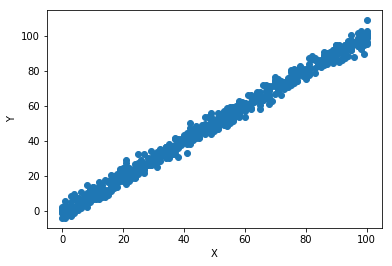

In [190]:
#scatter plot
plt.scatter(x=data_df.iloc[:, 0], y=data_df.iloc[:, 1])
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

y=mx+b

error is given by the guessed or approximated values of y minus initial values of y, ie the target(y column in this dataset) squared. ie

((mx+b)-y)**2

where mx+b is the approximated y
 
 The function below calculates this error

In [191]:
def Error(m,b,data):
    #y=mx+b
    error=0.0
    for i in range(len(data)):
        x=data.iloc[i,0]
        y=data.iloc[i,1]
        
        # initial value of y
        initial_y=y
        
        #approx y
        #mx+b
        approx_y=m*x+b
        
        #Squared error
        currentSquareError=(initial_y - approx_y)**2
       
        error += currentSquareError
        
    return error/len(data)
        
    
        
        
        
        
    

Fitting a line y=3x+4

In [192]:
m=3
b=4
error=Error(3,4,data_df)

print('For the fitting line: y = %sx + %s\nError: %.2f' %(m,b,error))

For the fitting line: y = 3x + 4
Error: 14191.78


Plotting the above line on our scatter plot.

Our error metric is a measure of closeness 
    If the line doesn't fit at all => Error will be BIG
    If the line fits well => Error will be SMALL
Our line below does not fit so well meanng the error is big, so we need to reduce it. 


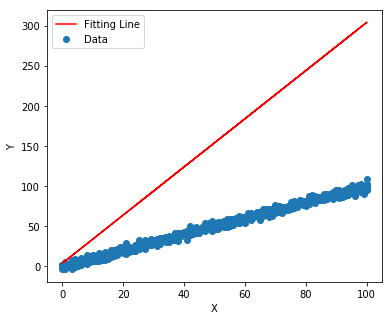

In [193]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.scatter(x=data_df.iloc[:,0],y=data_df.iloc[:,1],label='Data')
plt.plot(data_df.iloc[:,0], m*data_df.iloc[:,0] + b,color='red',label='Fitting Line')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='best')

plt.show()


From the initial line we will update the parameters to make the error smaller. The parameters to be updated are m and b

To do this, we Compute the partial derivatives respect to 'm' and 'b'. Get the direction that decreases the gradient (towards zero error) and update 'm' and 'b' accordingly
What we need to compute the Gradient Descent:
The current 'm' and 'b' to know which is our current fitting line
The real data, that corresponds to 'target' on the equation of the image
What will do:
Partial derivatives respect to 'm' and 'b'
What we will return:
The new 'better' updated 'm' and 'b'

In [199]:
def gradient_descent(m,b,data,learning_rate):
    
    N = len(data_df)
 
    m_found = 0
    b_found = 0

    for i in range(0,len(data_df)):

        #Get current pair (x,y)
        x = data_df.iloc[i,0]
        y = data_df.iloc[i,1]

        #Partial derivative respect 'm'  
        #2*x*error
        dm = -((2/N)* x* (y - (m*x + b)))
        
        
        #Partial derivative respect 'b'
        #2*error
        db = - ((2/N) * (y - (m*x + b)))
    
        #Update gradient
        m_found = m + dm
        b_found= b + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - learning_rate*m_found
    b_updated = b - learning_rate*b_found
    
    
    return m_updated,b_updated

In [231]:
def gradient_descent_step(starting_b, starting_m ,data,learning_rate, steps):
    b = starting_b
    m = starting_m
    display_freq = steps//10
    for i in range(steps):
        b, m = gradient_descent(b, m, data, learning_rate)
        if(i % display_freq == 0):
            error = Error(m,b,data)
            print('At step %d - Line: y = %.4fx + %.4f - Error: %.4f' %(i+1,m,b,error))
    
    
    print('\nBest  line: y = %.4fx + %.4f - Error: %.4f' %(m,b,error))
    return b, m

In [232]:
m_best,b_best = gradient_descent_step(0,0,data_df,0.05,10)

At step 1 - Line: y = 0.0136x + 1.3180 - Error: 3121.9923
At step 2 - Line: y = 0.0082x + 0.7958 - Error: 3207.4268
At step 3 - Line: y = 0.0103x + 1.0027 - Error: 3173.4212
At step 4 - Line: y = 0.0095x + 0.9207 - Error: 3186.8701
At step 5 - Line: y = 0.0098x + 0.9532 - Error: 3181.5377
At step 6 - Line: y = 0.0097x + 0.9403 - Error: 3183.6499
At step 7 - Line: y = 0.0097x + 0.9454 - Error: 3182.8129
At step 8 - Line: y = 0.0097x + 0.9434 - Error: 3183.1445
At step 9 - Line: y = 0.0097x + 0.9442 - Error: 3183.0131
At step 10 - Line: y = 0.0097x + 0.9439 - Error: 3183.0652

Best  line: y = 0.0097x + 0.9439 - Error: 3183.0652


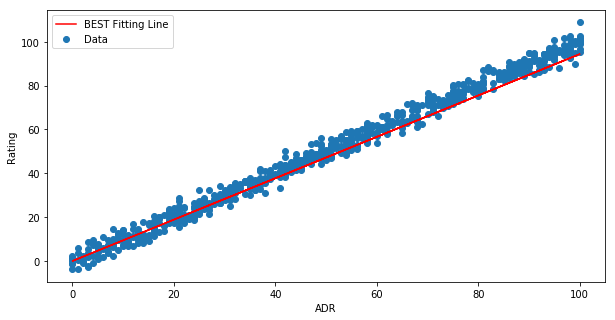

In [233]:
#plot the best line
m=m_best
b=b_best
x = data_df.iloc[:,0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x=x,y=data_df.iloc[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()